In [1]:
# Load ADNI model

import pickle

# adni = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/weights0.pkl', 'rb'))
adni = {'coef': None, 'intercept': 0}
adni['coef'] = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/corrBalanced.pkl', 'rb'))


list(adni.keys())

['coef', 'intercept']

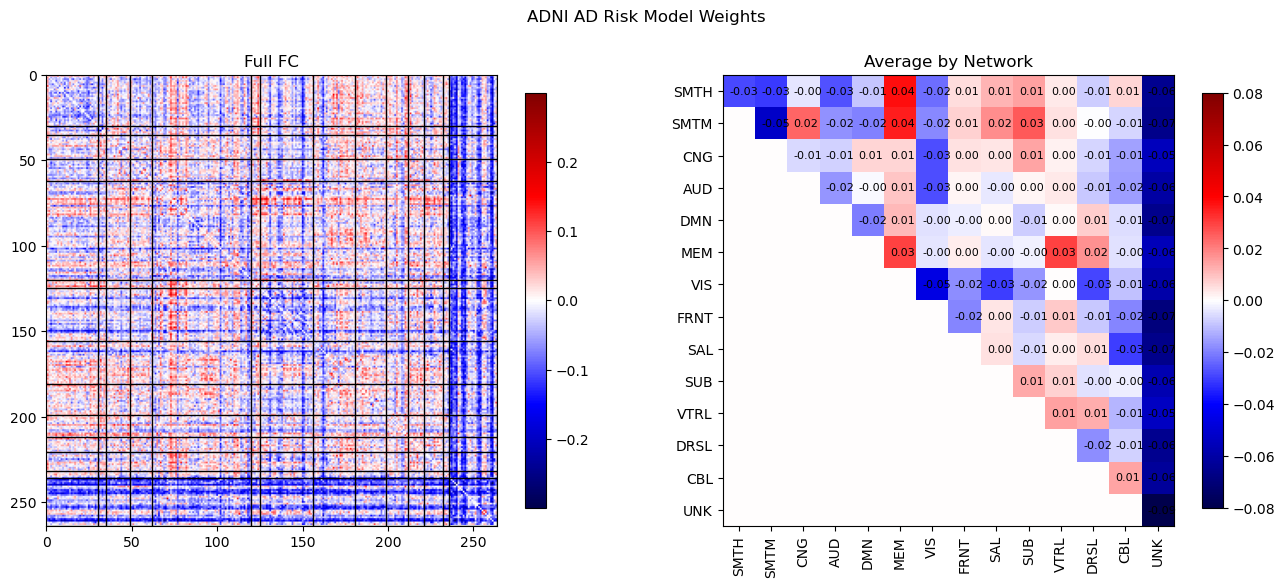

In [28]:
import numpy as np
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt

divis = [0,30,35,49,62,120,125,156,181,199,212,221,232,236,264]
labels = ['SMTH','SMTM','CNG','AUD','DMN','MEM','VIS','FRNT','SAL','SUB','VTRL','DRSL','CBL','UNK']

def getlabel(i):
    for j in range(len(divis)):
        if i >= divis[j] and i < divis[j+1]:
            return labels[j]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

w = adni['coef']
W = vec2mat(w)

regs = np.zeros([14,14])
for i in range(14):
    itop = divis[i]
    ibot = divis[i+1]
    for j in range(14):
        if i > j:
            continue
        jtop = divis[j]
        jbot = divis[j+1]
        regs[i,j] = np.mean(W[itop:ibot,jtop:jbot])

fig, ax = plt.subplots(1,2,figsize=(16,6))

norm1 = TwoSlopeNorm(vmax=0.3, vmin=-0.3, vcenter=0)
norm2 = TwoSlopeNorm(vmax=0.08, vmin=-0.08, vcenter=0)

pos = ax[0].imshow(W, norm=norm1, cmap='seismic')
fig.colorbar(pos, ax=ax[0], shrink=0.9)

pos = ax[1].imshow(regs, norm=norm2, cmap='seismic')
fig.colorbar(pos, ax=ax[1], shrink=0.9)

for i in range(len(divis)-1):
    d = divis[i+1]
    ax[0].plot([0, 264], [d, d], color='black', linewidth=1)
    ax[0].plot([d, d], [0, 264], color='black', linewidth=1)

ax[0].set_xlim([0,264])
ax[0].set_ylim([264,0])

for i in range(14):
    for j in range(14):
        if i >= j:
            ax[1].text(i-0.3,j+0.1,"{:.2f}".format(regs[j,i]),fontsize=8)

ax[1].set_yticks(np.arange(14))
ax[1].set_xticks(np.arange(14))
ax[1].set_xticklabels(labels, rotation=90)
ax[1].set_yticklabels(labels)

ax[0].set_title('Full FC')
ax[1].set_title('Average by Network')

fig.suptitle('ADNI AD Risk Model Weights')
fig.show()
fig.savefig('/home/anton/Documents/Yale/ADNI/ADCorrBalancedWeights.pdf')

In [30]:
# Get top magnitude AD regions

a,b = np.triu_indices(264,1)
asc = np.argsort(w)
dsc = asc[::-1]

print('Most negative')
for i in range(10):
    r1 = a[asc[i]]
    r2 = b[asc[i]]
    print(asc[i], r1, r2, getlabel(r1), getlabel(r2), w[asc[i]])

print('Most positive')
for i in range(10):
    r1 = a[dsc[i]]
    r2 = b[dsc[i]]
    print(dsc[i], r1, r2, getlabel(r1), getlabel(r2), w[dsc[i]])

Most negative
34437 239 261 UNK UNK -0.31628837430979584
17508 77 261 DMN UNK -0.27419446471483455
34416 239 240 UNK UNK -0.2660933033559277
17507 77 260 DMN UNK -0.24972237214565127
32609 198 237 SAL UNK -0.24732336029712162
14991 64 240 DMN UNK -0.2459657032184907
15992 69 261 DMN UNK -0.24395250250101674
28700 153 243 VIS UNK -0.23939916187788438
24306 119 150 DMN VIS -0.23474005565133962
22623 107 261 DMN UNK -0.2296960350732074
Most positive
15471 67 129 DMN VIS 0.19041119124481054
14479 62 127 DMN VIS 0.18533142020664922
16645 73 148 DMN VIS 0.17585876141508855
16626 73 129 DMN VIS 0.17376577966424184
16621 73 124 DMN MEM 0.17240539643184724
16625 73 128 DMN VIS 0.16775554598339854
16364 71 248 DMN UNK 0.16098754782115407
16631 73 134 DMN VIS 0.15957962205748738
16572 73 75 DMN DMN 0.15719914803105473
17022 75 148 DMN VIS 0.1569167044844321
